## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.8723 - accuracy: 0.3306 - val_loss: 1.7247 - val_accuracy: 0.3956
Epoch 2/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.6490 - accuracy: 0.4161 - val_loss: 1.6545 - val_accuracy: 0.4164
Epoch 3/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5603 - accuracy: 0.4485 - val_loss: 1.5638 - val_accuracy: 0.4436
Epoch 4/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4973 - accuracy: 0.4693 - val_loss: 1.5715 - val_accuracy: 0.4368
Epoch 5/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4509 - accuracy: 0.4871 - val_loss: 1.6487 - val_accuracy: 0.4253
Epoch 6/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4085 - accuracy: 0.5007 - val_loss: 1.4891 - val_accuracy: 0.4732
Epoch 7/500
50000/50000 [==============================] - 3s 

Epoch 56/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.3512 - accuracy: 0.8760 - val_loss: 2.2284 - val_accuracy: 0.5269
Epoch 57/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3418 - accuracy: 0.8793 - val_loss: 2.1275 - val_accuracy: 0.5155
Epoch 58/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3360 - accuracy: 0.8804 - val_loss: 2.2342 - val_accuracy: 0.5239
Epoch 59/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.3187 - accuracy: 0.8872 - val_loss: 2.2659 - val_accuracy: 0.5310
Epoch 60/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3038 - accuracy: 0.8934 - val_loss: 2.2979 - val_accuracy: 0.5270
Epoch 61/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2909 - accuracy: 0.8975 - val_loss: 2.2929 - val_accuracy: 0.5270
Epoch 62/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2829 - accuracy: 0.9004

Epoch 111/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.1237 - accuracy: 0.9554 - val_loss: 3.7786 - val_accuracy: 0.5302
Epoch 112/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0784 - accuracy: 0.9734 - val_loss: 3.7793 - val_accuracy: 0.5372
Epoch 113/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0780 - accuracy: 0.9730 - val_loss: 3.9805 - val_accuracy: 0.5404
Epoch 114/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0799 - accuracy: 0.9714 - val_loss: 3.8372 - val_accuracy: 0.5311
Epoch 115/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0776 - accuracy: 0.9727 - val_loss: 3.9132 - val_accuracy: 0.5325
Epoch 116/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1020 - accuracy: 0.9639 - val_loss: 3.9365 - val_accuracy: 0.5357
Epoch 117/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.0755 - accuracy

50000/50000 [==============================] - 3s 70us/step - loss: 0.0856 - accuracy: 0.9706 - val_loss: 4.7754 - val_accuracy: 0.5316
Epoch 166/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0644 - accuracy: 0.9779 - val_loss: 4.7048 - val_accuracy: 0.5260
Epoch 167/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0741 - accuracy: 0.9750 - val_loss: 4.6845 - val_accuracy: 0.5341
Epoch 168/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0722 - accuracy: 0.9753 - val_loss: 4.6953 - val_accuracy: 0.5361
Epoch 169/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0541 - accuracy: 0.9815 - val_loss: 4.7867 - val_accuracy: 0.5286
Epoch 170/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0445 - accuracy: 0.9849 - val_loss: 4.8832 - val_accuracy: 0.5236
Epoch 171/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0453 - accuracy: 0.9849 - val

50000/50000 [==============================] - 3s 67us/step - loss: 1.8289e-04 - accuracy: 1.0000 - val_loss: 5.2472 - val_accuracy: 0.5566
Epoch 219/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.8082e-04 - accuracy: 1.0000 - val_loss: 5.2502 - val_accuracy: 0.5556
Epoch 220/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.7948e-04 - accuracy: 1.0000 - val_loss: 5.2511 - val_accuracy: 0.5561
Epoch 221/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.7683e-04 - accuracy: 1.0000 - val_loss: 5.2564 - val_accuracy: 0.5563
Epoch 222/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.7573e-04 - accuracy: 1.0000 - val_loss: 5.2564 - val_accuracy: 0.5562
Epoch 223/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.7185e-04 - accuracy: 1.0000 - val_loss: 5.2625 - val_accuracy: 0.5557
Epoch 224/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.7141

50000/50000 [==============================] - 5s 99us/step - loss: 1.1603e-04 - accuracy: 1.0000 - val_loss: 5.3849 - val_accuracy: 0.5553
Epoch 272/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1551e-04 - accuracy: 1.0000 - val_loss: 5.3867 - val_accuracy: 0.5551
Epoch 273/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1483e-04 - accuracy: 1.0000 - val_loss: 5.3857 - val_accuracy: 0.5557
Epoch 274/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1375e-04 - accuracy: 1.0000 - val_loss: 5.3905 - val_accuracy: 0.5554
Epoch 275/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1320e-04 - accuracy: 1.0000 - val_loss: 5.3923 - val_accuracy: 0.5553
Epoch 276/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1277e-04 - accuracy: 1.0000 - val_loss: 5.3940 - val_accuracy: 0.5550
Epoch 277/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1188e-

50000/50000 [==============================] - 5s 92us/step - loss: 8.7579e-05 - accuracy: 1.0000 - val_loss: 5.4722 - val_accuracy: 0.5554
Epoch 325/500
50000/50000 [==============================] - 5s 100us/step - loss: 8.7204e-05 - accuracy: 1.0000 - val_loss: 5.4721 - val_accuracy: 0.5553
Epoch 326/500
50000/50000 [==============================] - 5s 91us/step - loss: 8.6864e-05 - accuracy: 1.0000 - val_loss: 5.4745 - val_accuracy: 0.5552
Epoch 327/500
50000/50000 [==============================] - 5s 93us/step - loss: 8.6533e-05 - accuracy: 1.0000 - val_loss: 5.4758 - val_accuracy: 0.5551
Epoch 328/500
50000/50000 [==============================] - 5s 92us/step - loss: 8.5950e-05 - accuracy: 1.0000 - val_loss: 5.4781 - val_accuracy: 0.5549
Epoch 329/500
50000/50000 [==============================] - 4s 83us/step - loss: 8.5594e-05 - accuracy: 1.0000 - val_loss: 5.4796 - val_accuracy: 0.5553
Epoch 330/500
50000/50000 [==============================] - 5s 92us/step - loss: 8.5319e

50000/50000 [==============================] - 4s 85us/step - loss: 7.1279e-05 - accuracy: 1.0000 - val_loss: 5.5385 - val_accuracy: 0.5548
Epoch 378/500
50000/50000 [==============================] - 5s 95us/step - loss: 7.1115e-05 - accuracy: 1.0000 - val_loss: 5.5397 - val_accuracy: 0.5551
Epoch 379/500
50000/50000 [==============================] - 4s 77us/step - loss: 7.0800e-05 - accuracy: 1.0000 - val_loss: 5.5411 - val_accuracy: 0.5550
Epoch 380/500
50000/50000 [==============================] - 5s 91us/step - loss: 7.0574e-05 - accuracy: 1.0000 - val_loss: 5.5429 - val_accuracy: 0.5557
Epoch 381/500
50000/50000 [==============================] - 3s 66us/step - loss: 7.0285e-05 - accuracy: 1.0000 - val_loss: 5.5424 - val_accuracy: 0.5550
Epoch 382/500
50000/50000 [==============================] - 3s 66us/step - loss: 7.0081e-05 - accuracy: 1.0000 - val_loss: 5.5429 - val_accuracy: 0.5549
Epoch 383/500
50000/50000 [==============================] - 3s 66us/step - loss: 6.9878e-

50000/50000 [==============================] - 4s 77us/step - loss: 6.0428e-05 - accuracy: 1.0000 - val_loss: 5.5935 - val_accuracy: 0.5557
Epoch 431/500
50000/50000 [==============================] - 5s 101us/step - loss: 6.0316e-05 - accuracy: 1.0000 - val_loss: 5.5933 - val_accuracy: 0.5557
Epoch 432/500
50000/50000 [==============================] - 3s 63us/step - loss: 6.0229e-05 - accuracy: 1.0000 - val_loss: 5.5951 - val_accuracy: 0.5560
Epoch 433/500
50000/50000 [==============================] - 5s 91us/step - loss: 5.9978e-05 - accuracy: 1.0000 - val_loss: 5.5952 - val_accuracy: 0.5557
Epoch 434/500
50000/50000 [==============================] - 5s 102us/step - loss: 5.9716e-05 - accuracy: 1.0000 - val_loss: 5.5973 - val_accuracy: 0.5558
Epoch 435/500
50000/50000 [==============================] - 4s 78us/step - loss: 5.9715e-05 - accuracy: 1.0000 - val_loss: 5.5983 - val_accuracy: 0.5554
Epoch 436/500
50000/50000 [==============================] - 5s 109us/step - loss: 5.940

50000/50000 [==============================] - 5s 101us/step - loss: 5.2759e-05 - accuracy: 1.0000 - val_loss: 5.6392 - val_accuracy: 0.5554
Epoch 484/500
50000/50000 [==============================] - 4s 78us/step - loss: 5.2623e-05 - accuracy: 1.0000 - val_loss: 5.6399 - val_accuracy: 0.5556
Epoch 485/500
50000/50000 [==============================] - 5s 103us/step - loss: 5.2561e-05 - accuracy: 1.0000 - val_loss: 5.6404 - val_accuracy: 0.5558
Epoch 486/500
50000/50000 [==============================] - 3s 66us/step - loss: 5.2378e-05 - accuracy: 1.0000 - val_loss: 5.6428 - val_accuracy: 0.5553
Epoch 487/500
50000/50000 [==============================] - 6s 126us/step - loss: 5.2251e-05 - accuracy: 1.0000 - val_loss: 5.6427 - val_accuracy: 0.5552
Epoch 488/500
50000/50000 [==============================] - 3s 66us/step - loss: 5.2221e-05 - accuracy: 1.0000 - val_loss: 5.6443 - val_accuracy: 0.5551
Epoch 489/500
50000/50000 [==============================] - 6s 111us/step - loss: 5.20

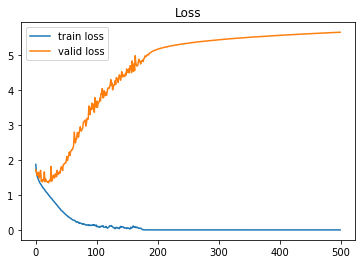

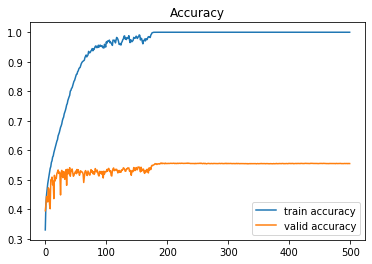

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()